In [7]:
!pip install tensorflow

In [9]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
## Divide the dataset into dependent and independent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [16]:
## Feature Engineering

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
dataset['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [20]:
dataset['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [23]:
## One-Hot Encoding
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [25]:
X=X.drop(['Geography','Gender'],axis=1)

In [29]:
X=pd.concat([X,geography,gender],axis=1)

In [30]:
## Splitting the dataset into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
print("Shape of Training data: ",X_train.shape)
print("Shape of Testing data: ",X_test.shape)

Shape of Training data:  (8000, 11)
Shape of Testing data:  (2000, 11)


In [32]:
## Creating ANN LAYER
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [34]:
## Creating 1st layer
model=Sequential()
model.add(Dense(units=11,activation='relu')) ## input layer
model.add(Dropout(0.3)) ## 1st drop out layer
model.add(Dense(units=7,activation='relu')) ## 1st hidden layer
model.add(Dropout(0.4)) ## 2nd drop out layer
model.add(Dense(units=6,activation='relu')) ## 2nd hidden layer
model.add(Dense(units=1,activation='sigmoid')) ## output layer

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=30)

Epoch 1/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.3688 - val_accuracy: 0.8266 - val_loss: 0.3781
Epoch 2/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8514 - loss: 0.3669 - val_accuracy: 0.8345 - val_loss: 0.3752
Epoch 3/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.3613 - val_accuracy: 0.8391 - val_loss: 0.3738
Epoch 4/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8473 - loss: 0.3679 - val_accuracy: 0.8364 - val_loss: 0.3733
Epoch 5/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.3702 - val_accuracy: 0.8289 - val_loss: 0.3781
Epoch 6/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.3677 - val_accuracy: 0.8285 - val_loss: 0.3771
Epoch 7/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8518 - loss: 0.3658 - val_accuracy: 0.8205 - val_loss: 0.3826
Epoch 8/30
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8511 - loss: 0.3576 - val_accuracy: 0.

In [40]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

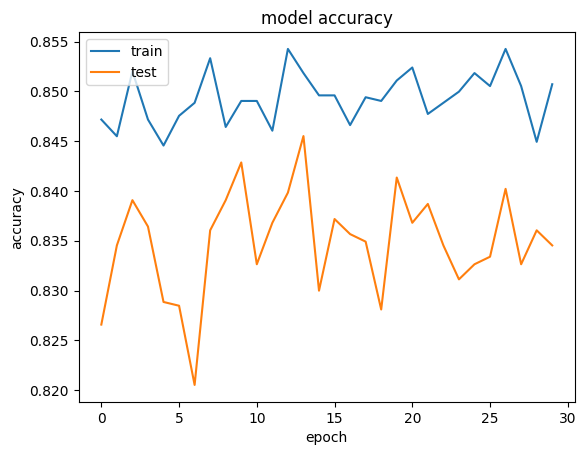

In [41]:
## Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [43]:
## Making the predictions and evaluating the model
y_pred=model.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1585,   10],
       [ 307,   98]])

In [45]:
## caluclate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8415

In [46]:
## get the weights
model.get_weights()

[array([[-1.89506933e-02,  9.76752024e-03, -3.77912670e-02,
          1.51684284e-01, -4.18698527e-02,  1.96912840e-01,
          1.90549761e-01, -8.90397653e-02, -3.52478698e-02,
          7.42931515e-02, -9.64410305e-02],
        [ 4.94255483e-01,  6.45008266e-01,  2.37148374e-01,
          6.21231616e-01,  2.90235102e-01, -8.49601567e-01,
         -5.92263401e-01,  4.06632900e-01,  2.40048349e-01,
          1.55948192e-01,  1.50131270e-01],
        [-1.82479732e-02,  7.43577331e-02, -5.42105958e-02,
         -8.63325298e-02,  3.07573732e-02, -1.25219822e-01,
          2.07450837e-01, -3.05125432e-04, -2.75387634e-02,
          4.97678034e-02, -3.21360752e-02],
        [ 5.59668057e-02, -4.66099568e-02, -5.26964307e-01,
          5.44048309e-01, -4.04930830e-01, -2.55554259e-01,
         -5.73329329e-01, -3.50971788e-01,  1.65522963e-01,
          1.22357495e-01,  3.05147201e-01],
        [-1.25658616e-01, -6.91365171e-03, -8.64590049e-01,
          6.74257576e-02, -9.65069890e-01,  